<a href="https://colab.research.google.com/github/imcalledaditi/Face-Mask-Detection-using-CNN-DL-/blob/main/Face_Mask_Detection_using_CNN(DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install kaggle

In [54]:
#confi the path Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

import dataset


In [55]:
#api
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [56]:
#extract the zip file of the dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [57]:
#list all the directories or the folders i have
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


importing the dependencies


In [58]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 #used for image processing
from google.colab.patches import cv2_imshow
from PIL import Image #a lib used for manipulating imgages
from sklearn.model_selection import train_test_split

In [59]:
#variable
with_mask_files = os.listdir  ('/content/data/with_mask') #listdir is all the filenames presnt in a folder
print (with_mask_files[0:5]) #1st 5 names
print (with_mask_files[-5:]) #last 5 name

['with_mask_1074.jpg', 'with_mask_1315.jpg', 'with_mask_2825.jpg', 'with_mask_1394.jpg', 'with_mask_1810.jpg']
['with_mask_2374.jpg', 'with_mask_869.jpg', 'with_mask_952.jpg', 'with_mask_3682.jpg', 'with_mask_1337.jpg']


In [60]:
without_mask_files = os.listdir('/content/data/without_mask')
print (without_mask_files[0:5])
print (without_mask_files[-5:])

['without_mask_1179.jpg', 'without_mask_3655.jpg', 'without_mask_569.jpg', 'without_mask_2715.jpg', 'without_mask_2689.jpg']
['without_mask_3686.jpg', 'without_mask_1200.jpg', 'without_mask_1643.jpg', 'without_mask_2316.jpg', 'without_mask_1889.jpg']


In [61]:
print ('Number of with masked images:', len(with_mask_files) )
print ('Number of without masked images:', len(without_mask_files) )

Number of with masked images: 3725
Number of without masked images: 3828


**Create Lables for the two classes of IMGs**

with mask --> 1
without mask --> 0

In [62]:
with_mask_lables = [1]*3725
without_mask_lables = [0]*3828

In [63]:
print (with_mask_lables[0:5])
print (without_mask_lables[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [64]:
print(len(with_mask_lables))
print(len(without_mask_lables))

3725
3828


In [65]:
lables = with_mask_lables + without_mask_lables
print (len(lables)) #total lables
print (lables[0:5])
print (lables[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displayig the imgs

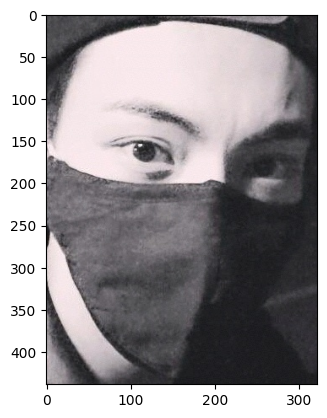

In [66]:
#displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1315.jpg')
imgplot = plt.imshow(img) #displying as matpltlib,plt ---> matpltlib.pyplt
plt.show()

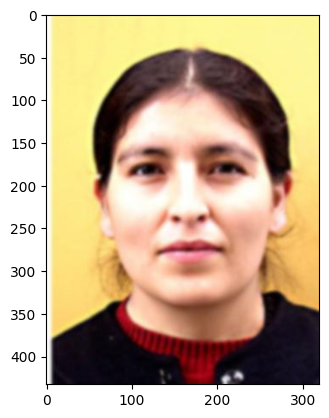

In [67]:
#displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1200.jpg')
imgplot = plt.imshow(img) #displying as matpltlib,plt ---> matpltlib.pyplt
plt.show()

**Image processing**



1.   resize img
2.   cov img to numpy arrays






In [71]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [72]:
type(data) #the type of the data

list

In [74]:
len(data)

7553

array([[[33, 23, 22],
        [33, 23, 22],
        [33, 23, 22],
        ...,
        [16, 10, 12],
        [16, 10, 12],
        [16, 10, 12]],

       [[33, 23, 22],
        [34, 24, 23],
        [35, 25, 24],
        ...,
        [16, 10, 12],
        [16, 10, 12],
        [16, 10, 12]],

       [[35, 26, 25],
        [36, 27, 25],
        [38, 28, 27],
        ...,
        [17, 10, 11],
        [17, 10, 11],
        [17, 10, 11]],

       ...,

       [[15, 17, 12],
        [16, 17, 12],
        [18, 19, 14],
        ...,
        [11, 10,  8],
        [ 9,  9,  7],
        [ 9,  9,  7]],

       [[14, 14,  9],
        [15, 15, 10],
        [16, 17, 12],
        ...,
        [10,  9,  8],
        [ 9,  9,  7],
        [ 9,  9,  7]],

       [[14, 13,  9],
        [15, 14, 10],
        [16, 15, 11],
        ...,
        [ 8,  8,  8],
        [ 8,  8,  6],
        [ 8,  8,  6]]], dtype=uint8)
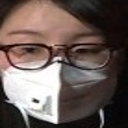

In [75]:
data[0]

In [77]:
type (data[0])

numpy.ndarray

In [78]:
data [0].shape

(128, 128, 3)

In [79]:
#converting img list(data) and lable list to numpy array
x = np.array(data)
y = np.array(lables)

In [80]:
type(x)

numpy.ndarray

In [82]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [83]:
print(y)

[1 1 1 ... 0 0 0]


**training and testing**

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)
#x is image array and y is lable array

In [87]:
print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [88]:
#scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

array([[[178, 179, 171],
        [178, 179, 171],
        [178, 179, 171],
        ...,
        [206, 207, 202],
        [206, 207, 202],
        [206, 207, 202]],

       [[178, 179, 171],
        [178, 179, 171],
        [178, 179, 171],
        ...,
        [206, 207, 202],
        [206, 207, 202],
        [206, 207, 202]],

       [[178, 179, 171],
        [178, 179, 171],
        [178, 179, 171],
        ...,
        [206, 207, 202],
        [206, 207, 202],
        [206, 207, 202]],

       ...,

       [[ 85, 152,  73],
        [ 85, 152,  73],
        [ 85, 152,  73],
        ...,
        [ 66,  64,  63],
        [ 46,  43,  40],
        [ 42,  39,  33]],

       [[ 83, 150,  71],
        [ 84, 151,  72],
        [ 84, 151,  72],
        ...,
        [ 86,  81,  83],
        [ 54,  47,  46],
        [ 46,  39,  35]],

       [[ 83, 150,  73],
        [ 84, 151,  74],
        [ 84, 151,  74],
        ...,
        [100,  94,  97],
        [ 61,  53,  53],
        [ 47,  38,  37]]], dtype=uint8)
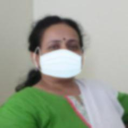

In [89]:
x_train[0]

In [90]:
x_train_scaled[0]

array([[[0.69803922, 0.70196078, 0.67058824],
        [0.69803922, 0.70196078, 0.67058824],
        [0.69803922, 0.70196078, 0.67058824],
        ...,
        [0.80784314, 0.81176471, 0.79215686],
        [0.80784314, 0.81176471, 0.79215686],
        [0.80784314, 0.81176471, 0.79215686]],

       [[0.69803922, 0.70196078, 0.67058824],
        [0.69803922, 0.70196078, 0.67058824],
        [0.69803922, 0.70196078, 0.67058824],
        ...,
        [0.80784314, 0.81176471, 0.79215686],
        [0.80784314, 0.81176471, 0.79215686],
        [0.80784314, 0.81176471, 0.79215686]],

       [[0.69803922, 0.70196078, 0.67058824],
        [0.69803922, 0.70196078, 0.67058824],
        [0.69803922, 0.70196078, 0.67058824],
        ...,
        [0.80784314, 0.81176471, 0.79215686],
        [0.80784314, 0.81176471, 0.79215686],
        [0.80784314, 0.81176471, 0.79215686]],

       ...,

       [[0.33333333, 0.59607843, 0.28627451],
        [0.33333333, 0.59607843, 0.28627451],
        [0.33333333, 0

**building a convolutional neural network**

In [92]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
number_of_class = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
